### 1.1 Least squares
- calculate intercept and slope by least squares according to data
- L represents the sum of the square distance between data and the line

$$
L:=\sum_{i=1}^{N}(y_i-\beta_0-\beta_1x_i)^2
$$

- Partially differentiate L by $\beta_0$ and $\beta_1$

$$
  \frac{\partial L}{\partial \beta_0} = 
  -2\sum_{i=1}^{N}(y_i-\beta_0-\beta_1x_i)=
  0
$$

$$
  \frac{\partial L}{\partial \beta_1} = 
  -2\sum_{i=1}^{N}x_i(y_i-\beta_0-\beta_1x_i)=
  0
$$

- By calculating the equations above, we can acquire equations below

$$
\hat{\beta_1} = \frac{\sum_{i=1}^{N}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{N}(x_i-\bar{x})^2}
$$

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}
$$

- If we assume $\beta_0 = 0$, we can calculate $\beta_1$ as below

$$
\hat{\beta_1} = \frac{\sum_{i=1}^{N}x_iy_i}{\sum_{i=1}^{N}x_i^2}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def min_sq(x, y):
    x_bar, y_bar = np.mean(x), np.mean(y)
    beta_1 = np.dot(x - x_bar, y - y_bar) / np.linalg.norm(x - x_bar) ** 2
    beta_0 = y_bar - beta_1 * x_bar
    return beta_1, beta_0

In [2]:
N = 100
a = np.random.normal(loc=2, scale=1, size=N)
b = np.random.randn(1)
x = np.random.randn(N)
y = a*x + b + np.random.randn(N)
a1, b1 = min_sq(x, y)
xx = x-np.mean(x)
yy = y-np.mean(y)
a2, b2=min_sq(xx, yy)

In [3]:
a2, b2

(1.8855573185901058, 8.361460847210526e-17)

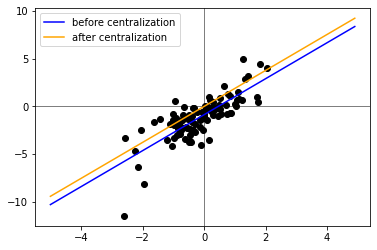

In [4]:
x_seq = np.arange(-5, 5, 0.1)
y_pre = x_seq*a1+b1
yy_pre=x_seq*a2+b2
plt.scatter(x, y, c="black")
plt.axhline(y=0, c="black", linewidth=0.5)
plt.axvline(x=0, c="black", linewidth=0.5)
plt.plot(x_seq, y_pre, c="blue", label="before centralization")
plt.plot(x_seq, yy_pre, c="orange", label="after centralization")
plt.legend(loc="upper left")

### 1.2 Multiple Regression

$$
y := \left[\begin{array}{c}
y_1 \\
\vdots \\
y_N\end{array}\right]
$$

$$
\boldsymbol{X}=
\left[\begin{array}{ccc}
1 & x_2 \\
\vdots & \vdots \\
1 & x_N\end{array}\right]
$$

$$
\beta = \left[\begin{array}{c}
\beta_0\\
\beta_1 \\
\end{array}\right]
$$

Based on
$$L := \sum_{i=1}^{N}(y_i-\beta_0-x_{i, 1}\beta_1)^2$, $L = ||y-\boldsymbol{X}\beta||^2
$$ and
$$\nabla L := \left[\begin{array}{c}\frac{\partial}{\partial \beta_1} \\
\frac{\partial}{\partial \beta_1}
\end{array}\right]
= -2\boldsymbol{X}^T(y-X\beta)
$$

In [6]:
n = 100
p = 2
beta = np.array([1, 2, 3])
x = np.random.randn(n, 2)
y = beta[0]+beta[1]*x[:, 0]+beta[2]*x[:, 1]+np.random.randn(n)
X = np.insert(x, 0, 1, axis=1)
np.linalg.inv(X.T@X)@X.T@y

array([1.01801278, 2.10082755, 2.95854482])